# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Ensure the correct path)

In [9]:
df = pd.read_csv("C:/Users/Asus/Downloads/Sales_Data.csv", encoding='unicode_escape')

In [12]:
print(df.head())  
print(df.info())  

   OrderID   OrderDate CustomerID CustomerName Region ProductID ProductName  \
0  ORD1000  2023-01-01    CUST200   Customer 1   East   PROD300   Product 1   
1  ORD1001  2023-01-02    CUST201   Customer 2   West   PROD301   Product 2   
2  ORD1002  2023-01-03    CUST202   Customer 3  North   PROD302   Product 3   
3  ORD1003  2023-01-04    CUST203   Customer 4   East   PROD303   Product 4   
4  ORD1004  2023-01-05    CUST204   Customer 5   East   PROD304   Product 5   

      Category  Quantity  UnitPrice  TotalSales  
0    Furniture         6     492.83     2956.98  
1  Electronics         1     240.82      240.82  
2  Electronics         9      99.23      893.07  
3        Books         1     247.54      247.54  
4    Furniture         5     261.10     1305.50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       500 non-null   

In [13]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors='coerce')

In [14]:
monthly_sales = df.groupby(df["OrderDate"].dt.to_period("M"))["TotalSales"].sum()

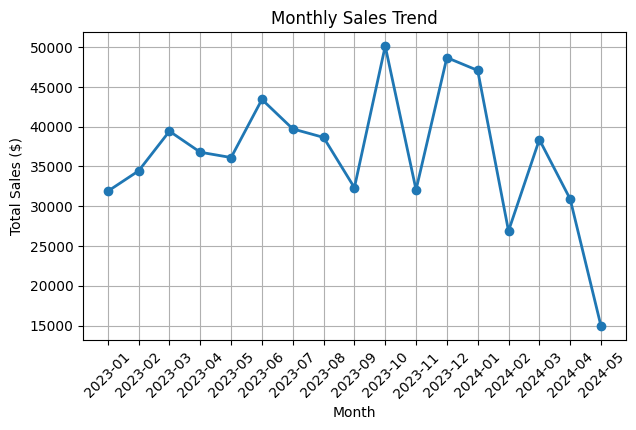

In [15]:
plt.figure(figsize=(7, 4))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()  

# Top 5 Best-Selling Products (Bar Chart)

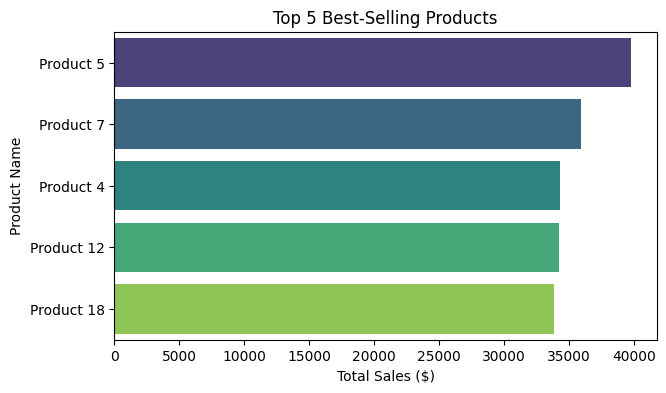

In [17]:
import seaborn as sns

top_products = df.groupby("ProductName")["TotalSales"].sum().nlargest(5)
plt.figure(figsize=(7, 4))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 5 Best-Selling Products")
plt.show()

# Sales Distribution by Region (Pie Chart)


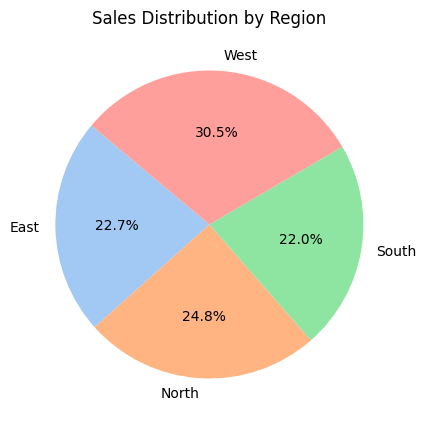

In [22]:
region_sales = df.groupby("Region")["TotalSales"].sum()
plt.figure(figsize=(5, 5))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Region")
plt.show()